In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pathlib import Path

In [2]:
data_train=pd.read_csv('train_LZdllcl.csv')
data_test=pd.read_csv('test_2umaH9m.csv')

In [3]:
data_train.shape

(54808, 14)

In [4]:
data_train.sample(8)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
35005,20717,Procurement,region_14,Master's & above,m,other,1,33,5.0,3,1,0,71,0
13102,43882,Finance,region_26,Bachelor's,m,other,1,37,4.0,3,0,0,58,0
1429,19485,Analytics,region_32,Bachelor's,m,other,1,35,1.0,4,0,0,85,0
23133,47592,Finance,region_7,Master's & above,m,sourcing,1,35,3.0,8,0,0,56,0
7383,34684,Procurement,region_2,Bachelor's,m,sourcing,1,37,4.0,3,1,0,66,0
43448,50194,R&D,region_22,Bachelor's,m,other,1,40,5.0,5,1,0,83,0
23074,42085,Sales & Marketing,region_23,Bachelor's,m,other,2,29,1.0,4,0,0,48,0
37212,2195,Technology,region_2,Bachelor's,f,sourcing,1,32,4.0,8,1,0,79,0


In [5]:
data_train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
data_train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [7]:
list(data_train.columns)

['employee_id',
 'department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

In [8]:
target = data_train.loc[:,'is_promoted']
target

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

In [9]:
data_train.columns


Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [10]:
numerical_features=[col for col in data_train.columns if data_train[col].dtypes!='object']

In [11]:
numerical_features

['employee_id',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

In [12]:
categorical_features = list(set(data_train.columns).difference(set(numerical_features)))
categorical_features

['region', 'recruitment_channel', 'department', 'gender', 'education']

In [13]:
for col in numerical_features:
    print(col)
    print(data_train[col].unique())

employee_id
[65438 65141  7513 ... 13918 13614 51526]
no_of_trainings
[ 1  2  3  4  7  5  6  8 10  9]
age
[35 30 34 39 45 31 33 28 32 49 37 38 41 27 29 26 24 57 40 42 23 59 44 50
 56 20 25 47 36 46 60 43 22 54 58 48 53 55 51 52 21]
previous_year_rating
[ 5.  3.  1.  4. nan  2.]
length_of_service
[ 8  4  7 10  2  5  6  1  3 16  9 11 26 12 17 14 13 19 15 23 18 20 22 25
 28 24 31 21 29 30 34 27 33 32 37]
KPIs_met >80%
[1 0]
awards_won?
[0 1]
avg_training_score
[49 60 50 73 85 59 63 83 54 77 80 84 51 46 75 57 70 68 79 44 72 61 48 58
 87 47 52 88 71 65 62 53 78 91 82 69 55 74 86 90 92 67 89 56 76 81 45 64
 39 94 93 66 95 42 96 40 99 43 97 41 98]
is_promoted
[0 1]


In [14]:
for col in categorical_features:
    print(col)
    print(data_train[col].unique())

region
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
recruitment_channel
['sourcing' 'other' 'referred']
department
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
gender
['f' 'm']
education
["Master's & above" "Bachelor's" nan 'Below Secondary']


In [15]:
sum(data_train['education'].isnull())/data_train['education'].isnull().count()*100

4.395343745438622

# % Null Values

In [16]:
def percent_null(df):
    null_percent = []
    col_name = []
    for col in df.columns:
        null_val = df[col].isnull().sum()/df[col].isnull().count()*100
        null_percent.append(null_val)
        col_name.append(col)
    return zip(col_name,null_percent)

In [17]:
for df in [data_train,data_test]:
    print(name :=[x for x in globals() if globals()[x] is df][0])
    null_scores = list(percent_null(df))
    print(null_scores)
    print('-'*100)

data_train
[('employee_id', 0.0), ('department', 0.0), ('region', 0.0), ('education', 4.395343745438622), ('gender', 0.0), ('recruitment_channel', 0.0), ('no_of_trainings', 0.0), ('age', 0.0), ('previous_year_rating', 7.524448985549554), ('length_of_service', 0.0), ('KPIs_met >80%', 0.0), ('awards_won?', 0.0), ('avg_training_score', 0.0), ('is_promoted', 0.0)]
----------------------------------------------------------------------------------------------------
data_test
[('employee_id', 0.0), ('department', 0.0), ('region', 0.0), ('education', 4.401873137505322), ('gender', 0.0), ('recruitment_channel', 0.0), ('no_of_trainings', 0.0), ('age', 0.0), ('previous_year_rating', 7.713920817369094), ('length_of_service', 0.0), ('KPIs_met >80%', 0.0), ('awards_won?', 0.0), ('avg_training_score', 0.0)]
----------------------------------------------------------------------------------------------------


In [18]:
#check if missing previous year ratings are for freshers
data_train['New_Joiner'] = data_train['length_of_service'].apply(lambda x : 'Fresher' if x == 1 else 'Experienced')
data_test['New_Joiner'] = data_test['length_of_service'].apply(lambda x : 'Fresher' if x == 1 else 'Experienced')

In [19]:
data_train['previous_year_rating'].isnull().sum()

4124

In [20]:
(data_train['New_Joiner'] =='Fresher').sum()

4547

In [21]:
set(data_train.loc[data_train['previous_year_rating'].isnull(),['length_of_service','New_Joiner','previous_year_rating']].index)

{8193,
 16389,
 24581,
 24583,
 49158,
 10,
 16396,
 40974,
 23,
 24599,
 32793,
 40983,
 16412,
 29,
 32797,
 32798,
 40991,
 8225,
 16417,
 40999,
 49192,
 8240,
 16434,
 24627,
 32818,
 32820,
 49206,
 8247,
 56,
 49207,
 58,
 49211,
 41020,
 62,
 16446,
 8256,
 49215,
 66,
 67,
 8262,
 41031,
 24649,
 41034,
 16459,
 32843,
 16462,
 8272,
 49232,
 84,
 32854,
 16471,
 16472,
 89,
 90,
 16474,
 96,
 8289,
 49248,
 24675,
 32869,
 32875,
 16492,
 8302,
 111,
 49265,
 16500,
 24692,
 16502,
 41078,
 123,
 16507,
 125,
 41084,
 127,
 8320,
 24704,
 41087,
 32900,
 49284,
 135,
 8327,
 8331,
 141,
 16527,
 49296,
 8337,
 16529,
 41109,
 49301,
 49306,
 32926,
 8351,
 160,
 49312,
 32931,
 32932,
 16551,
 8360,
 16554,
 24747,
 32939,
 8365,
 32941,
 8367,
 32942,
 32945,
 178,
 24754,
 49329,
 24760,
 24762,
 49338,
 49342,
 41155,
 24772,
 16582,
 32969,
 16589,
 16590,
 49357,
 24789,
 214,
 49365,
 32984,
 16601,
 16603,
 220,
 16605,
 32989,
 41179,
 8416,
 8417,
 24805,
 41191,
 23

In [22]:
set(data_train[data_train['New_Joiner']=='Fresher'].index)

{8193,
 32770,
 16389,
 24581,
 24583,
 49158,
 10,
 16396,
 40974,
 23,
 24599,
 32793,
 40983,
 16412,
 29,
 32797,
 32798,
 40991,
 8225,
 16417,
 40999,
 49192,
 8240,
 16434,
 24627,
 32818,
 32820,
 49206,
 8247,
 56,
 49207,
 58,
 49211,
 41020,
 62,
 16446,
 8256,
 49215,
 66,
 67,
 8262,
 41031,
 24649,
 16458,
 16459,
 32843,
 41034,
 16462,
 8272,
 49232,
 84,
 32854,
 16471,
 16472,
 89,
 90,
 16474,
 96,
 8289,
 49248,
 24675,
 32869,
 49253,
 32875,
 16492,
 8302,
 111,
 49265,
 16500,
 24692,
 16502,
 41078,
 123,
 16507,
 125,
 41084,
 127,
 8320,
 24704,
 41087,
 32899,
 32900,
 49284,
 135,
 8327,
 8331,
 141,
 16527,
 49296,
 8337,
 16529,
 41109,
 49301,
 49306,
 32926,
 8351,
 160,
 49312,
 32931,
 32932,
 16551,
 8360,
 16554,
 24747,
 32939,
 8365,
 32941,
 8367,
 32942,
 32945,
 178,
 24754,
 32948,
 49329,
 8374,
 24760,
 24762,
 49338,
 8381,
 49342,
 41155,
 24772,
 41157,
 16582,
 32969,
 16589,
 16590,
 49357,
 24789,
 214,
 49365,
 32984,
 16601,
 16603,
 

In [23]:
set(data_train[data_train['New_Joiner']=='Fresher'].index).difference(set(data_train.loc[data_train['previous_year_rating'].isnull(),['length_of_service','New_Joiner','previous_year_rating']].index))

{439,
 461,
 526,
 536,
 784,
 853,
 1406,
 1731,
 1734,
 1802,
 2132,
 2249,
 2617,
 2685,
 2714,
 2828,
 3112,
 3255,
 3345,
 3605,
 3838,
 4176,
 4328,
 4419,
 4434,
 4492,
 4514,
 5042,
 5184,
 5266,
 5553,
 5557,
 5582,
 5825,
 5929,
 6077,
 6115,
 6202,
 6265,
 6281,
 6357,
 6404,
 6470,
 6532,
 6596,
 6599,
 6723,
 7100,
 7515,
 7804,
 7855,
 8077,
 8082,
 8126,
 8148,
 8374,
 8381,
 8422,
 8533,
 8762,
 8808,
 8909,
 9055,
 9421,
 9430,
 9642,
 9743,
 9939,
 9991,
 10106,
 10129,
 10309,
 10640,
 10851,
 10987,
 11484,
 11488,
 11664,
 11918,
 12433,
 12435,
 12438,
 12440,
 12531,
 12563,
 12591,
 13059,
 13073,
 13192,
 13244,
 13376,
 13626,
 13707,
 13855,
 13981,
 14357,
 14581,
 14621,
 14643,
 14772,
 14929,
 15059,
 15082,
 15122,
 15160,
 15237,
 15530,
 15555,
 15606,
 15805,
 15891,
 15900,
 16230,
 16275,
 16333,
 16458,
 16635,
 16782,
 16809,
 16810,
 16862,
 17041,
 17089,
 17462,
 17587,
 17715,
 17786,
 17850,
 17852,
 17917,
 18063,
 18192,
 18781,
 18850,
 18

In [24]:
data_train.loc[set(data_train[data_train['New_Joiner']=='Fresher'].index).difference(set(data_train.loc[data_train['previous_year_rating'].isnull(),['length_of_service','New_Joiner','previous_year_rating']].index)),['length_of_service','New_Joiner','previous_year_rating']]

C:\Users\anshu\AppData\Local\Temp\ipykernel_19760\865241514.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data_train.loc[set(data_train[data_train['New_Joiner']=='Fresher'].index).difference(set(data_train.loc[data_train['previous_year_rating'].isnull(),['length_of_service','New_Joiner','previous_year_rating']].index)),['length_of_service','New_Joiner','previous_year_rating']]


,length_of_service,New_Joiner,previous_year_rating
32770,1,Fresher,5.0
14357,1,Fresher,4.0
51232,1,Fresher,3.0
28710,1,Fresher,3.0
28730,1,Fresher,3.0
...,...,...,...
6115,1,Fresher,4.0
38883,1,Fresher,3.0
49128,1,Fresher,3.0
49130,1,Fresher,2.0


In [25]:
data_train[(data_train['previous_year_rating'].isnull() == True)].index

Int64Index([   10,    23,    29,    56,    58,    62,    66,    67,    84,
               89,
            ...
            54659, 54666, 54683, 54690, 54700, 54703, 54734, 54746, 54773,
            54801],
           dtype='int64', length=4124)

In [26]:
data_train['New_Joiner'] == 'Fresher'

0        False
1        False
2        False
3        False
4        False
         ...  
54803    False
54804    False
54805    False
54806    False
54807    False
Name: New_Joiner, Length: 54808, dtype: bool

In [27]:
#Fresher but no rating , impute with zero
data_train.loc[data_train[(data_train['New_Joiner'] == 'Fresher') & (data_train['previous_year_rating'].isnull() == True)].index
              , ['previous_year_rating']]=0
data_test.loc[data_test[(data_test['New_Joiner'] == 'Fresher') & (data_test['previous_year_rating'].isnull() == True)].index
              , ['previous_year_rating']]=0

In [28]:
data_test['previous_year_rating'].isnull().sum()

0

# EDA

<AxesSubplot:>

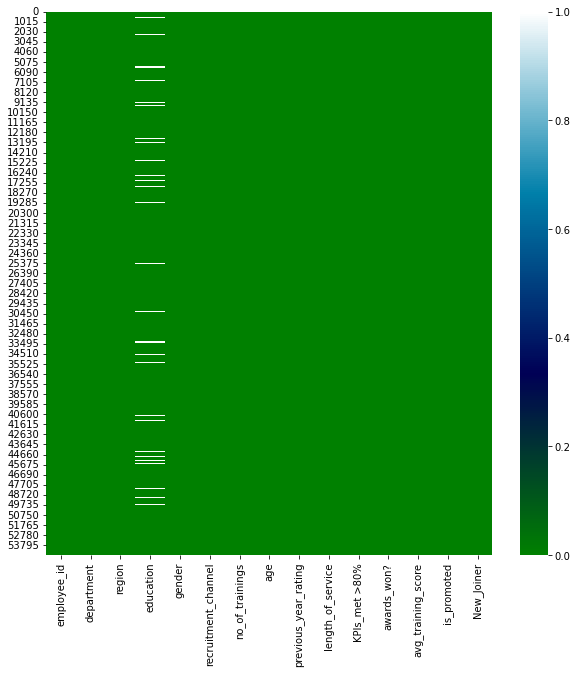

In [29]:
plt.rcParams['figure.figsize']=(10,10)
#plt.style.use('default')
sns.heatmap(data=data_train.isnull(),cmap = 'ocean')

<AxesSubplot:>

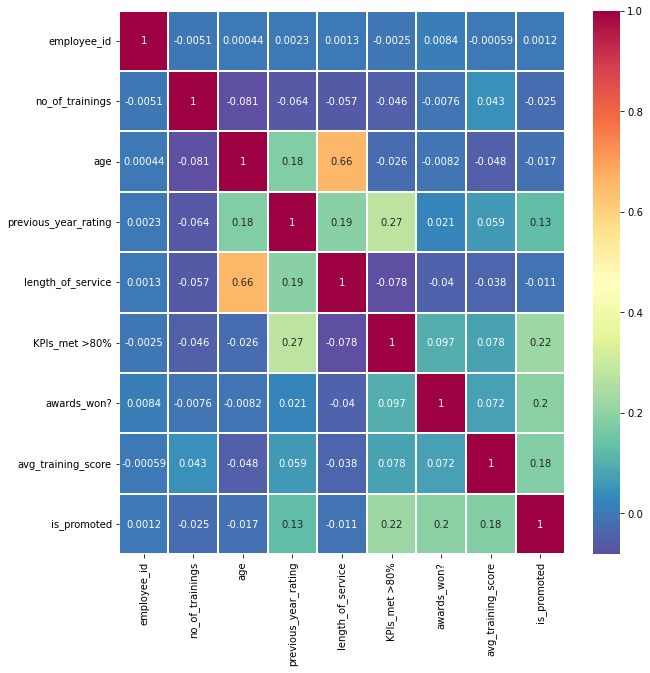

In [30]:
sns.heatmap(data=data_train.corr(),cmap = 'Spectral_r',annot=True,linewidths=0.01)

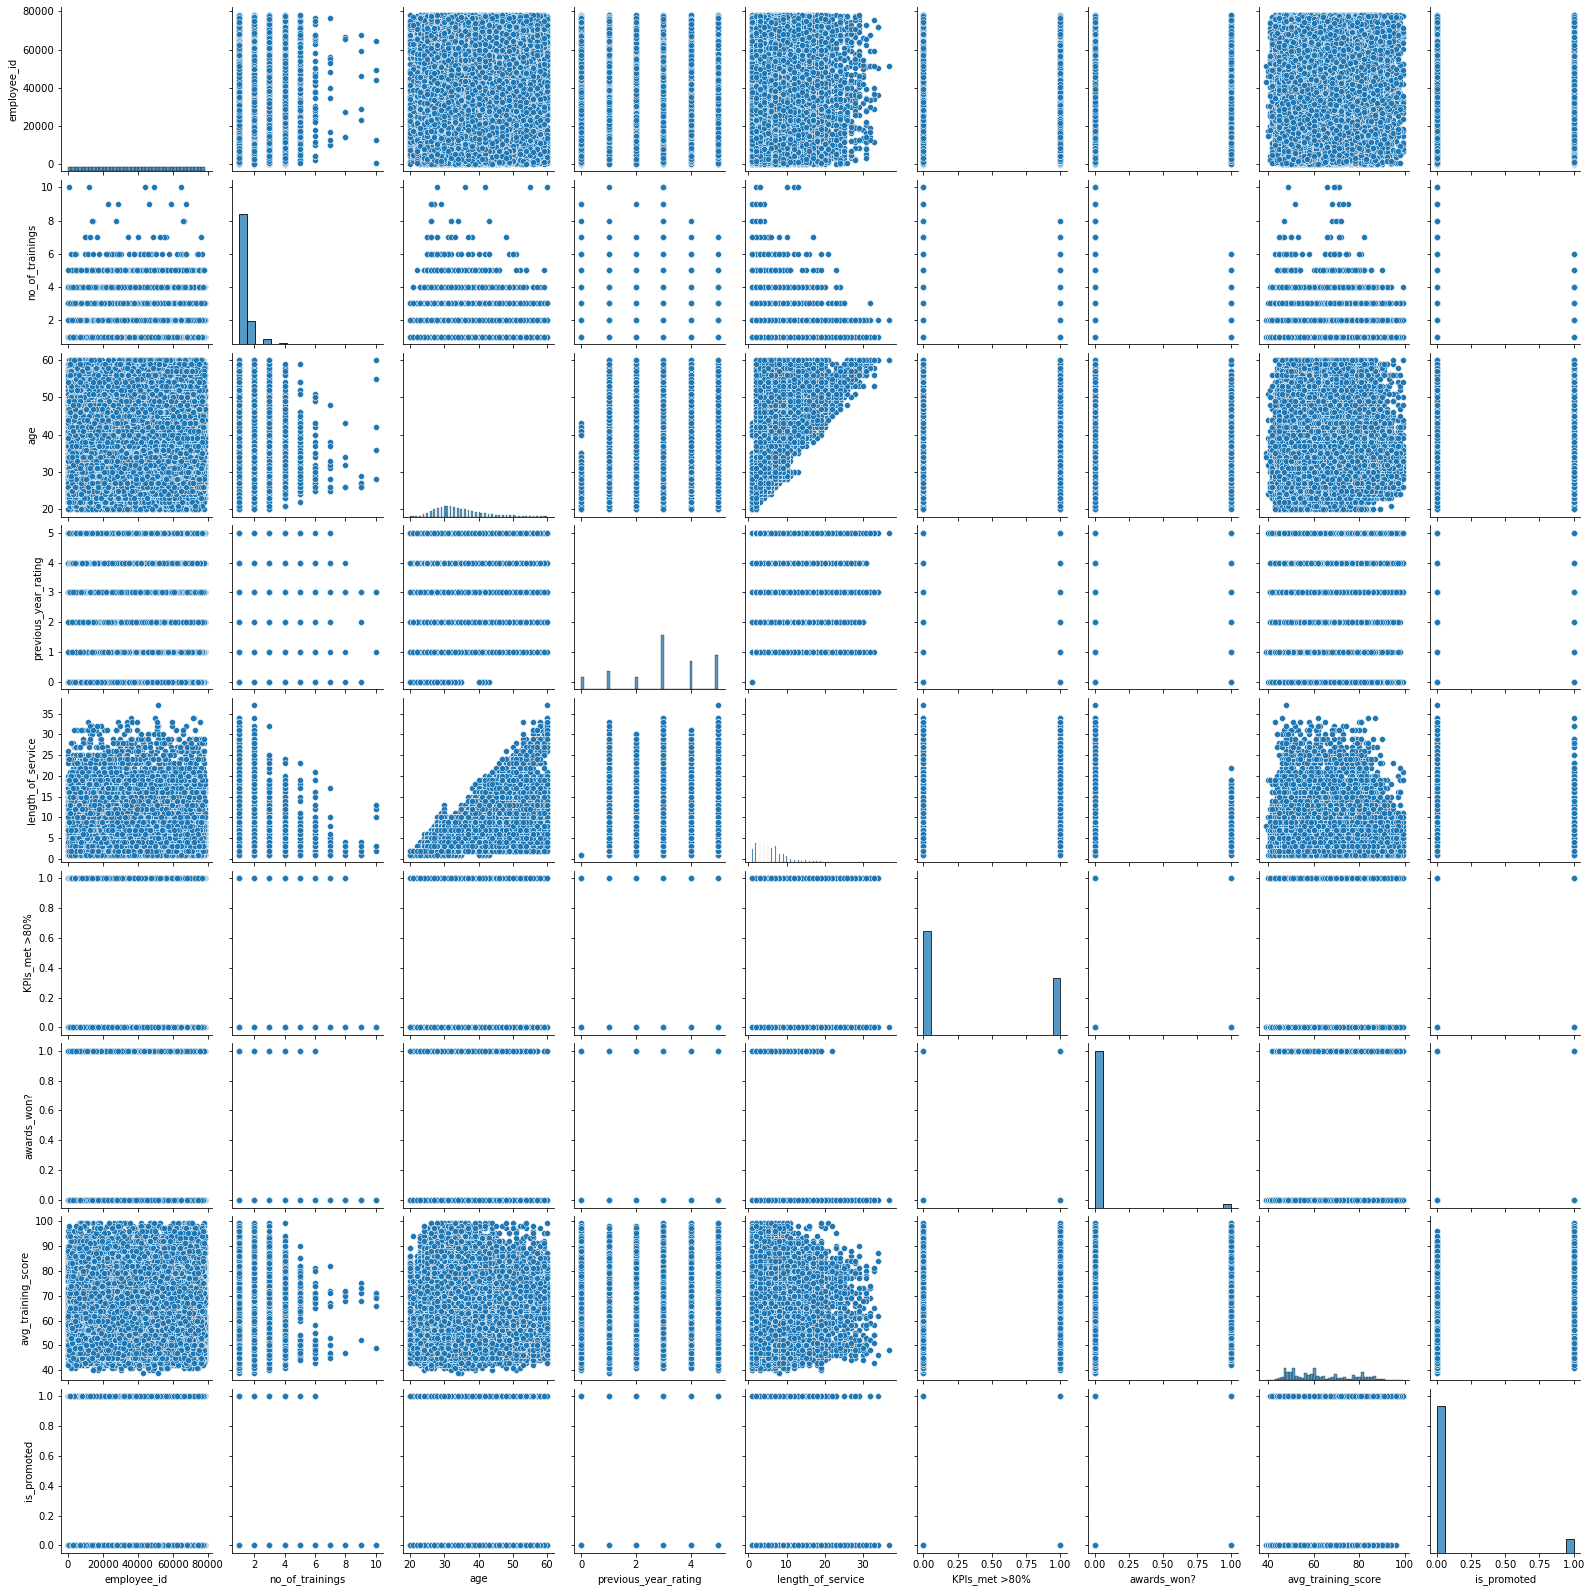

In [31]:
sns.pairplot(data_train)

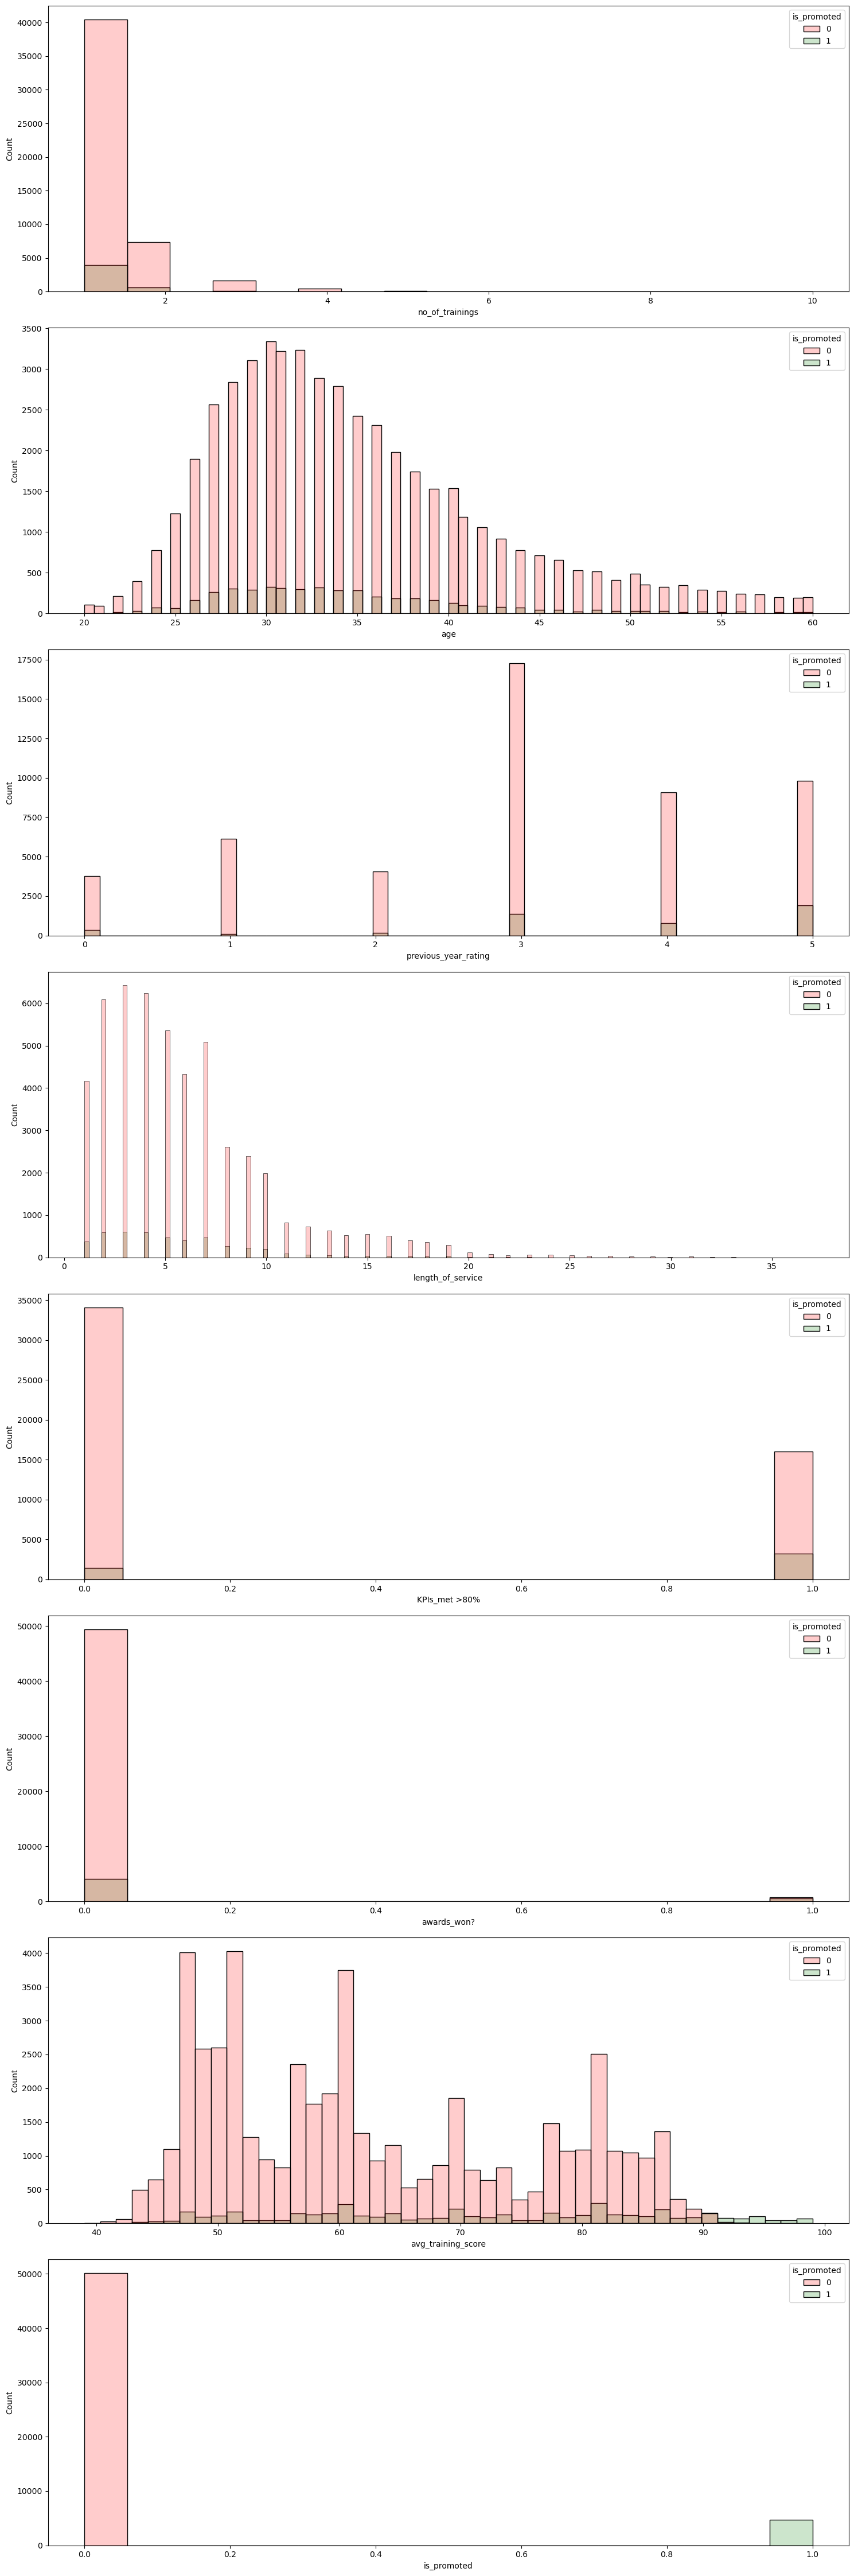

In [32]:
i=0
plt.style.use('default')
fig,ax = plt.subplots(8,1,figsize=(15, 45),tight_layout=True)
plt.rcParams
for col in numerical_features:
    if(col != 'employee_id'):
        sns.histplot(ax=ax[i],data=data_train,x=col,legend = True,hue='is_promoted',palette={1:"green", 0:"red"},alpha=0.2)
        #ax[i].legend()
        i=i+1

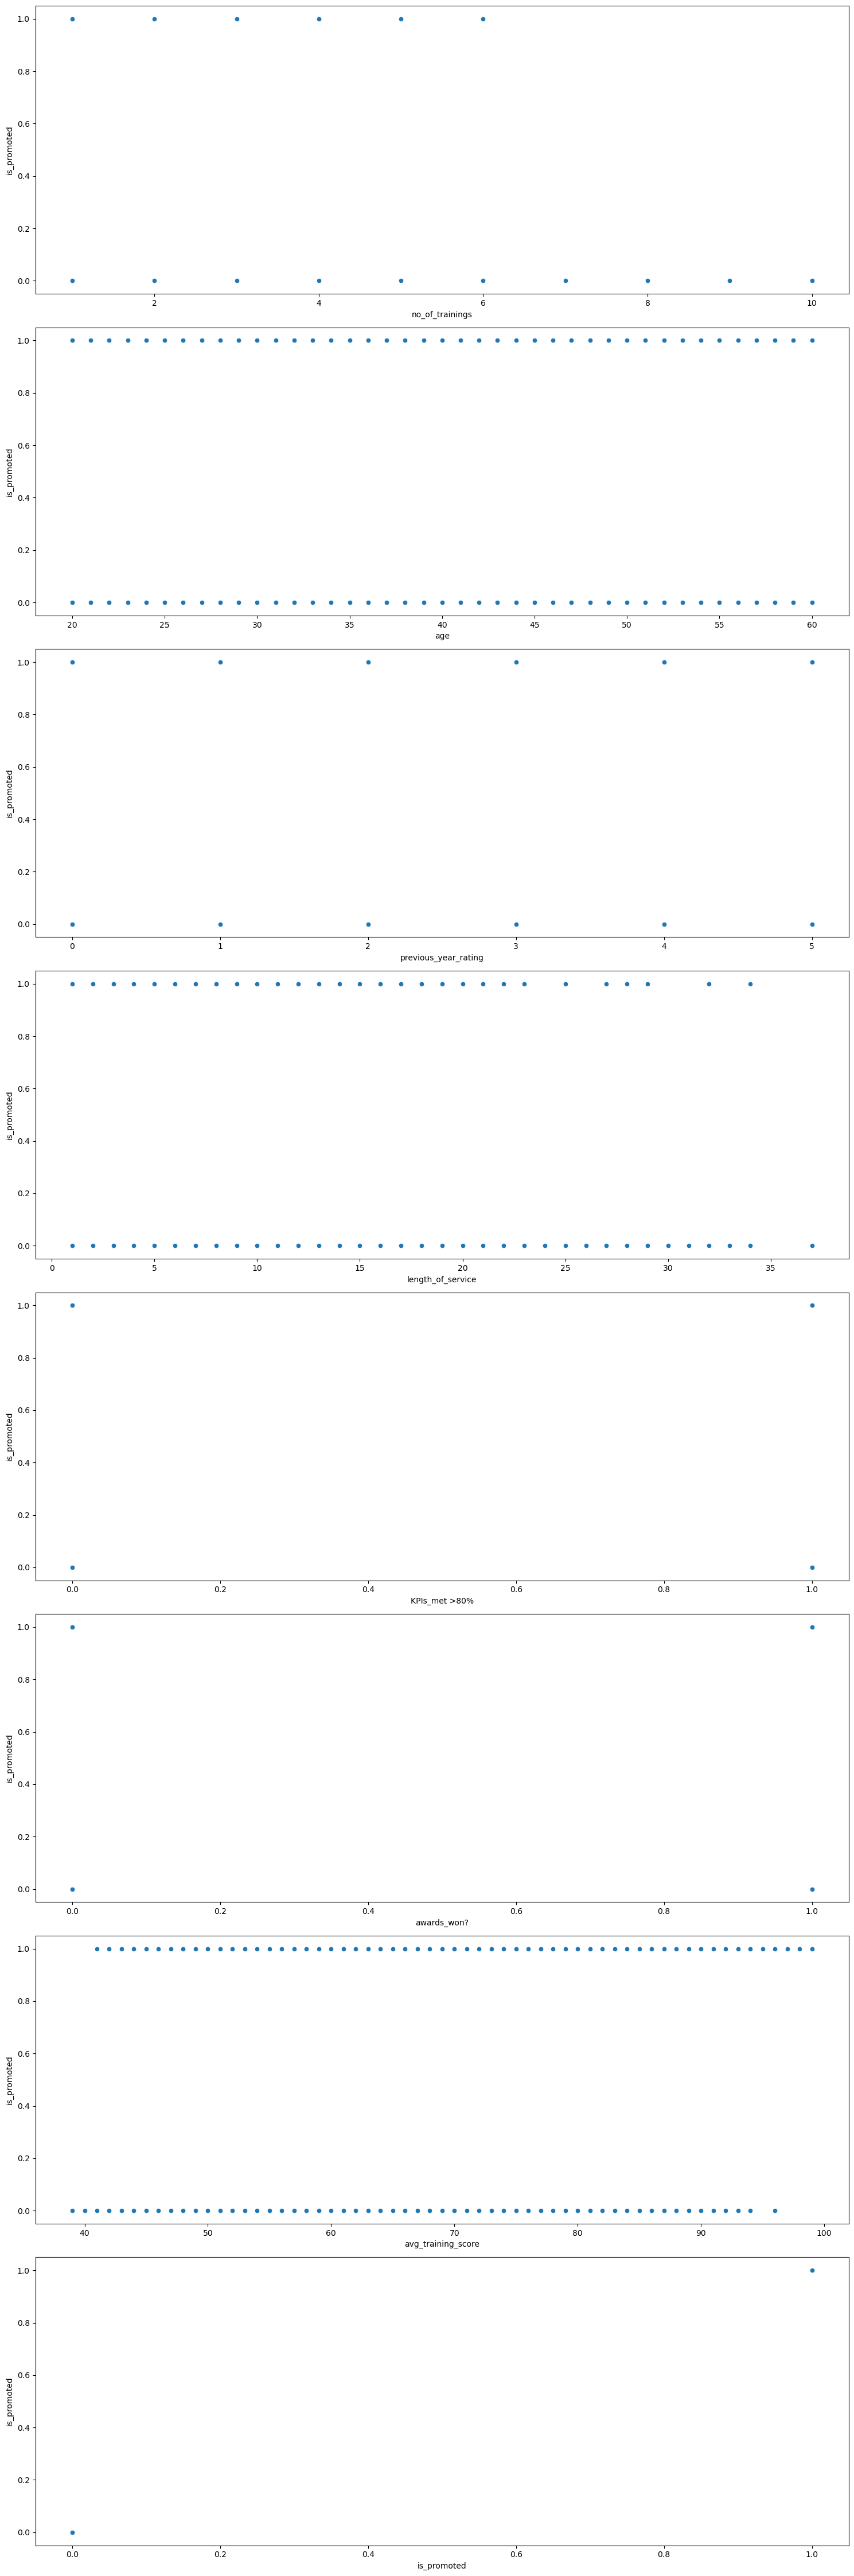

In [33]:
i=0
#plt.style.use('Solarize_Light2')
fig,ax = plt.subplots(8,1,figsize=(15, 45),tight_layout=True)
plt.rcParams
for col in numerical_features:
    if(col != 'employee_id'):
        sns.scatterplot(ax=ax[i],data=data_train,x=col,y='is_promoted',legend = True)
        #ax[i].legend()
        i=i+1

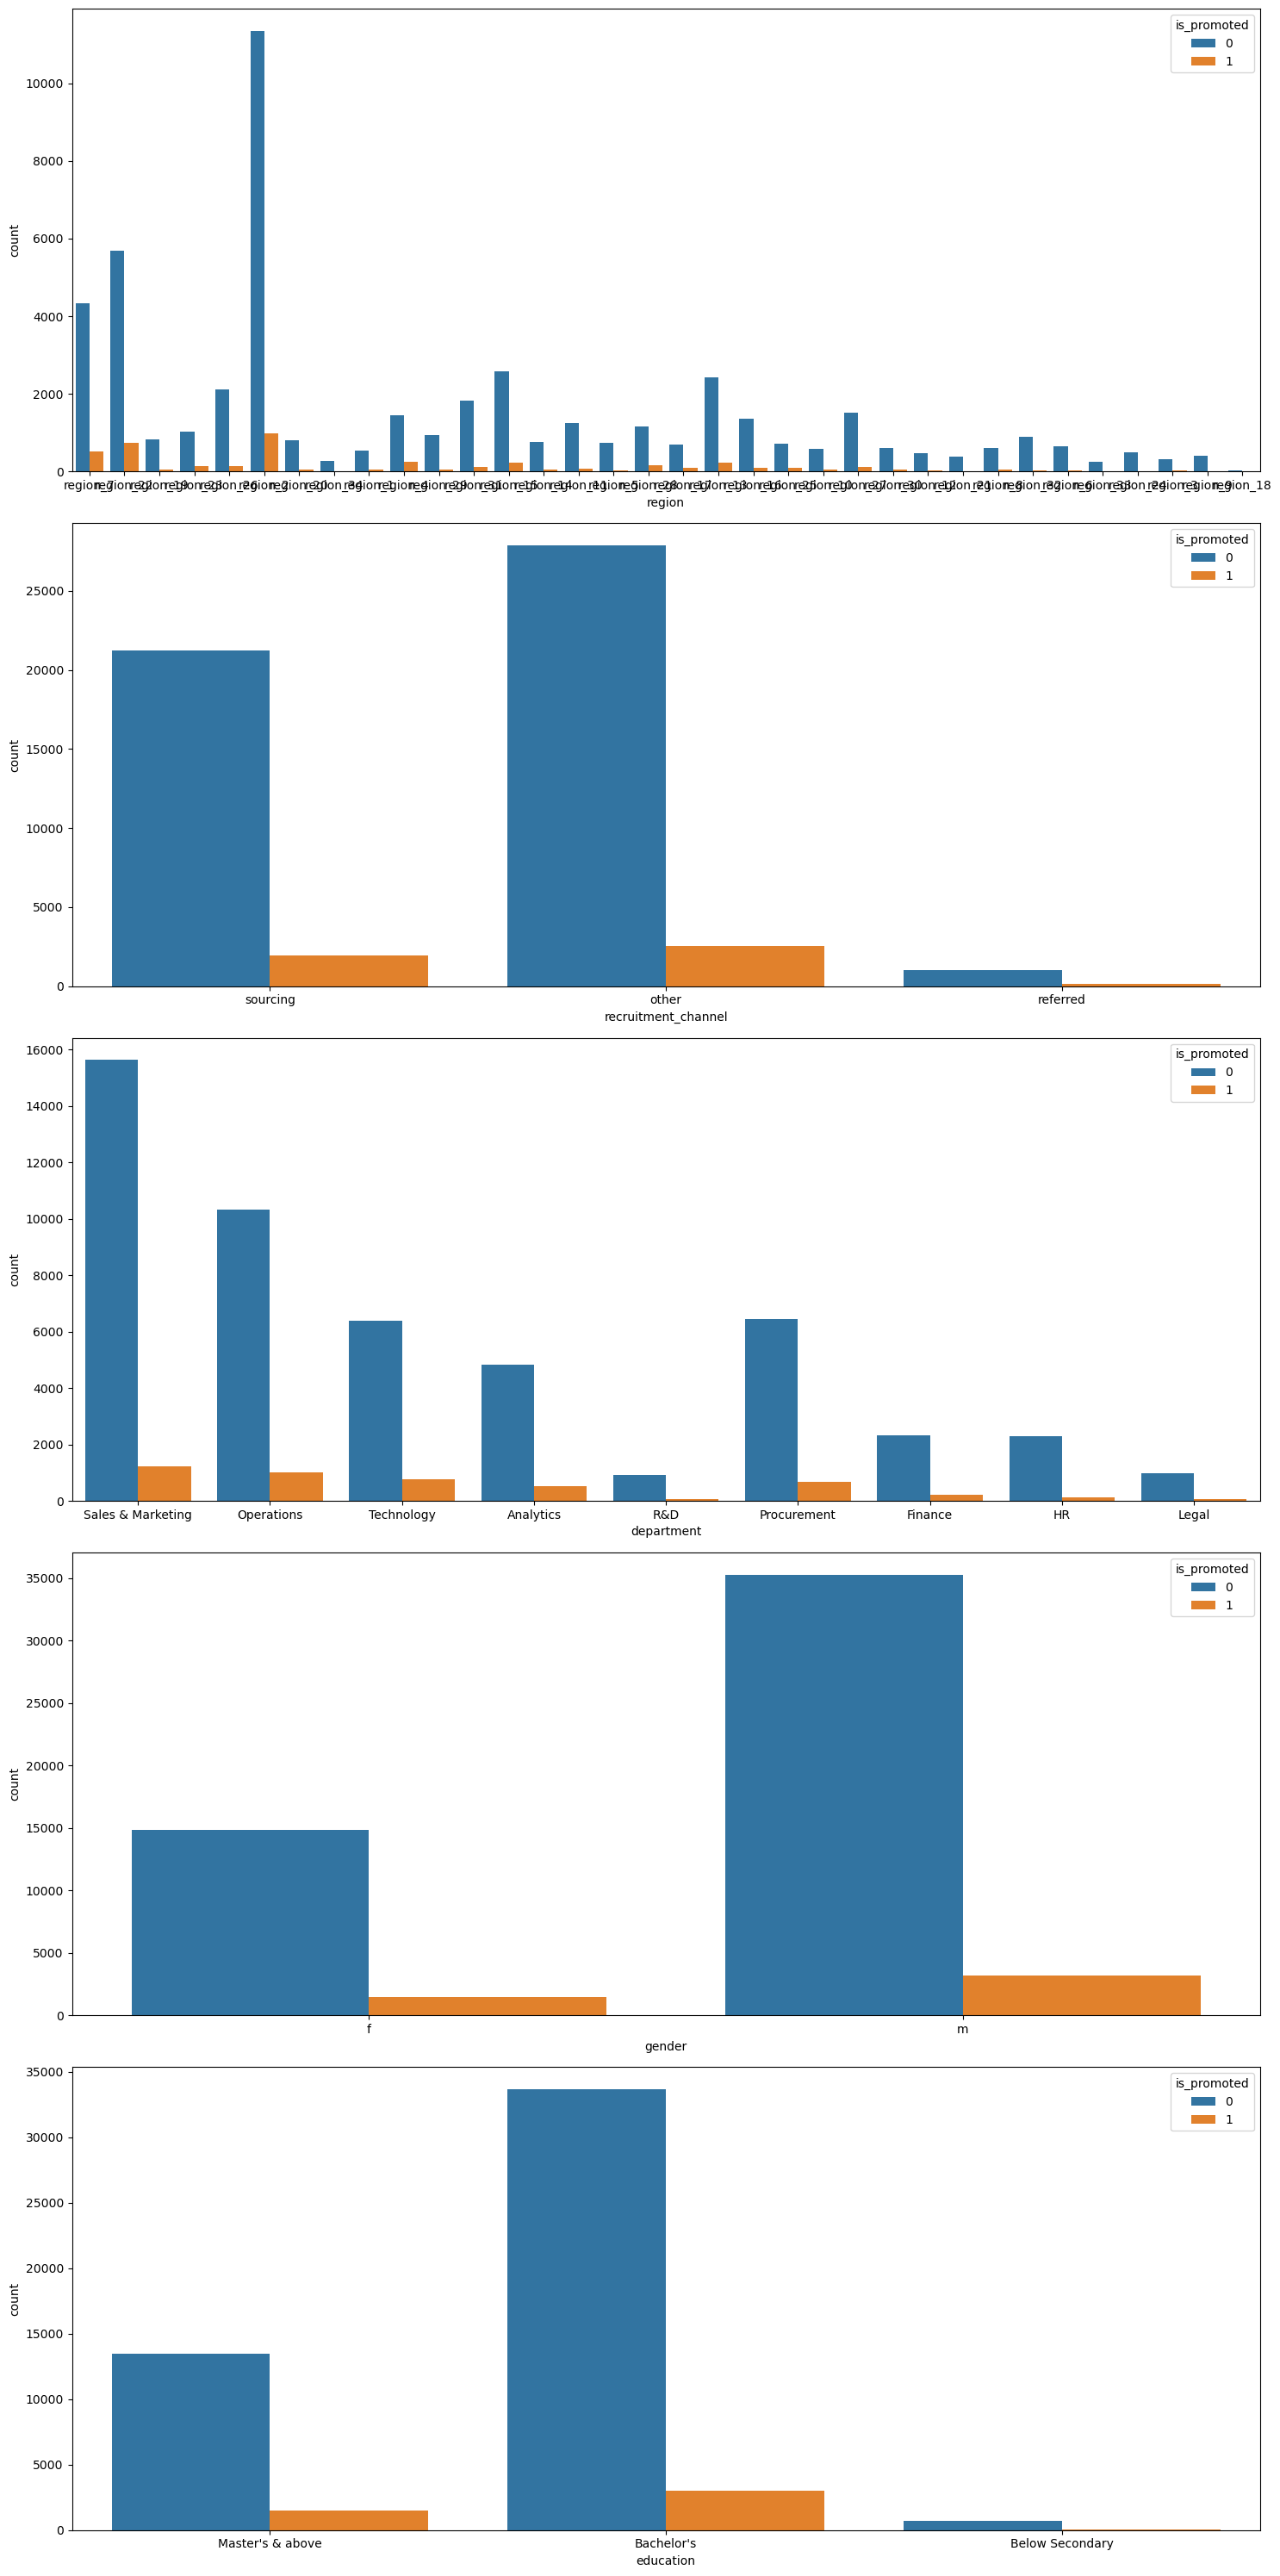

In [34]:
i = 0
fig,ax = plt.subplots(len(categorical_features),1,figsize=(15, 30),tight_layout=True)
for col in categorical_features:
    sns.countplot(data=data_train,x=col,ax=ax[i],hue='is_promoted')
    i=i+1
    

In [35]:
len(categorical_features)

5

# Impute Null Values

In [36]:
#Impute NUMERICAL columns
for df in [data_train,data_test]:
    for col in df.columns:
        if df[col].dtypes!='object' and df[col].isnull().sum()>0 :
            print(col)
            df[col+'_Imputed'] = df.groupby('recruitment_channel')[col].transform(lambda x : x.fillna(np.mean(x)))
            df.drop(axis = 1 , columns= col,inplace=True)
        elif df[col].dtypes =='object' and df[col].isnull().sum()>0:
            print(col)
            #df[col+'_Imputed'] = df[col].astype('string')
            df[col+'_Imputed'] = df[col].fillna('Blank')
            #df[col+'_Imputed'].astype('object')
            df.drop(axis = 1 , columns= col,inplace=True)       

education
education


In [37]:
data_train.columns

Index(['employee_id', 'department', 'region', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'New_Joiner', 'education_Imputed'],
      dtype='object')

In [38]:
for df in [data_train,data_test]:
    print(name :=[x for x in globals() if globals()[x] is df][0])
    null_scores = list(percent_null(df))
    print(null_scores)
    print('-'*100)

data_train
[('employee_id', 0.0), ('department', 0.0), ('region', 0.0), ('gender', 0.0), ('recruitment_channel', 0.0), ('no_of_trainings', 0.0), ('age', 0.0), ('previous_year_rating', 0.0), ('length_of_service', 0.0), ('KPIs_met >80%', 0.0), ('awards_won?', 0.0), ('avg_training_score', 0.0), ('is_promoted', 0.0), ('New_Joiner', 0.0), ('education_Imputed', 0.0)]
----------------------------------------------------------------------------------------------------
data_test
[('employee_id', 0.0), ('department', 0.0), ('region', 0.0), ('gender', 0.0), ('recruitment_channel', 0.0), ('no_of_trainings', 0.0), ('age', 0.0), ('previous_year_rating', 0.0), ('length_of_service', 0.0), ('KPIs_met >80%', 0.0), ('awards_won?', 0.0), ('avg_training_score', 0.0), ('New_Joiner', 0.0), ('education_Imputed', 0.0)]
----------------------------------------------------------------------------------------------------


# Drop Irrelevant Columns

In [39]:
col_to_drop_train = ['employee_id','is_promoted']
target  =data_train['is_promoted']
data_train.drop(axis = 1, columns=col_to_drop_train,inplace=True)
col_to_drop_test = ['employee_id']
data_test.drop(axis=1,columns=col_to_drop_test,inplace=True)

# Encode Data

In [40]:
data_train_ENC = pd.get_dummies(data_train,drop_first=True)
data_test_ENC = pd.get_dummies(data_test , drop_first=True)

In [41]:
data_train_ENC.columns.values

array(['no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_10', 'region_region_11', 'region_region_12',
       'region_region_13', 'region_region_14', 'region_region_15',
       'region_region_16', 'region_region_17', 'region_region_18',
       'region_region_19', 'region_region_2', 'region_region_20',
       'region_region_21', 'region_region_22', 'region_region_23',
       'region_region_24', 'region_region_25', 'region_region_26',
       'region_region_27', 'region_region_28', 'region_region_29',
       'region_region_3', 'region_region_30', 'region_region_31',
       'region_region_32', 'region_region_33', 'region_region_34',
       'region_region_4', 'region_region_5', 'r

In [42]:
data_test_ENC.columns.values

array(['no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_10', 'region_region_11', 'region_region_12',
       'region_region_13', 'region_region_14', 'region_region_15',
       'region_region_16', 'region_region_17', 'region_region_18',
       'region_region_19', 'region_region_2', 'region_region_20',
       'region_region_21', 'region_region_22', 'region_region_23',
       'region_region_24', 'region_region_25', 'region_region_26',
       'region_region_27', 'region_region_28', 'region_region_29',
       'region_region_3', 'region_region_30', 'region_region_31',
       'region_region_32', 'region_region_33', 'region_region_34',
       'region_region_4', 'region_region_5', 'r

# Standardize Dataframes

In [116]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [124]:
MMS = MinMaxScaler()
#MMS = RobustScaler()

In [125]:
data_train_mms_arr = MMS.fit_transform(data_train_ENC)

In [126]:
data_train_ENC_MMS = pd.DataFrame(data =data_train_mms_arr,columns=data_train_ENC.columns)

In [127]:
data_train_ENC_MMS.sample(100)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_7,region_region_8,region_region_9,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,New_Joiner_Fresher,education_Imputed_Below Secondary,education_Imputed_Blank,education_Imputed_Master's & above
38800,0.00,0.30,0.40,0.25,1.00,0.00,0.47,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
24052,0.00,0.28,0.80,0.08,0.00,1.00,0.30,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00
6288,0.00,0.57,1.00,0.17,1.00,0.00,0.73,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
41456,0.00,0.45,0.60,0.19,1.00,0.00,0.53,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
23466,0.00,0.35,0.80,0.19,0.00,0.00,0.15,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53895,0.22,0.18,0.60,0.08,0.00,0.00,0.32,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
17179,0.11,0.25,0.80,0.14,0.00,0.00,0.12,0.00,1.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
12132,0.00,0.20,0.40,0.08,0.00,0.00,0.32,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
44415,0.00,0.60,0.80,0.17,0.00,0.00,0.15,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00


In [128]:
data_test_mms_arr = MMS.transform(data_test_ENC)

In [129]:
data_test_ENC_MMS = pd.DataFrame(data =data_test_mms_arr,columns=data_test_ENC.columns)

# Feature Selection usin SlectKBest

In [131]:
from sklearn.feature_selection import chi2,SelectKBest
skb = SelectKBest(score_func=chi2, k = 'all')
skb.fit(data_train_ENC_MMS,target)

SelectKBest(k='all', score_func=<function chi2 at 0x000001A8C82565E0>)

In [132]:
kscore_df = pd.DataFrame(data = skb.scores_,index=data_train_ENC_MMS.columns,columns=['Score'])

In [133]:
kscore_df.sort_values(by = 'Score',ascending=False)

,Score
awards_won?,2054.01
KPIs_met >80%,1743.83
avg_training_score,219.76
previous_year_rating,126.56
region_region_4,76.81
region_region_22,69.47
department_Technology,46.06
department_Sales & Marketing,37.31
education_Imputed_Blank,36.86
education_Imputed_Master's & above,34.34


In [134]:
select_names_kbest = skb.get_support()
select_names_kbest

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [135]:
feature_names_kbest = data_train_ENC_MMS.columns[select_names_kbest]
feature_names_kbest

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_10', 'region_region_11', 'region_region_12',
       'region_region_13', 'region_region_14', 'region_region_15',
       'region_region_16', 'region_region_17', 'region_region_18',
       'region_region_19', 'region_region_2', 'region_region_20',
       'region_region_21', 'region_region_22', 'region_region_23',
       'region_region_24', 'region_region_25', 'region_region_26',
       'region_region_27', 'region_region_28', 'region_region_29',
       'region_region_3', 'region_region_30', 'region_region_31',
       'region_region_32', 'region_region_33', 'region_region_34',
       'region_region_4', 'region_region_5', 'region_r

In [136]:
data_train_ENC_MMS_KBest = data_train_ENC_MMS[feature_names_kbest]
data_test_ENC_MMS_KBest = data_test_ENC_MMS[feature_names_kbest]
data_train_ENC_MMS_KBest.shape

(54808, 55)

In [137]:
data_test_ENC_MMS_KBest.shape

(23490, 55)

# Since Class is unbalanced, We can use oversampling to balance


In [145]:
#Using Over Sampling
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

In [146]:
# X_train, X_test, y_train, y_test= train_test_split(data_train_ENC_MMS_KBest,target,test_size=0.2)

In [149]:
over_sampler = SMOTE(k_neighbors=2)
X_res, y_res = over_sampler.fit_resample(data_train_ENC_MMS_KBest,target)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 50140, 1: 50140})
Testing target statistics: Counter({0: 10020, 1: 942})


In [155]:
  Counter(target)

Counter({0: 50140, 1: 4668})

# Lazy Learner

In [67]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import cross_val_score

In [68]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7999, 5)
(2000, 5)
(7999,)
(2000,)


In [69]:
y_test.value_counts()

0    1836
1     164
Name: is_promoted, dtype: int64

In [70]:
LL_clf = LazyClassifier(verbose=1)

In [74]:
LL_clf.fit(X_train=X_res,X_test=X_test,y_train=y_res,y_test=y_test)

  7%|▋         | 2/29 [00:00<00:06,  4.39it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.7265, 'Balanced Accuracy': 0.6733421010680696, 'ROC AUC': 0.6733421010680696, 'F1 Score': 0.7855905128866734, 'Time taken': 0.3870718479156494}
{'Model': 'BaggingClassifier', 'Accuracy': 0.78, 'Balanced Accuracy': 0.6552818959562144, 'ROC AUC': 0.6552818959562144, 'F1 Score': 0.8214520285263649, 'Time taken': 0.10648512840270996}
{'Model': 'BernoulliNB', 'Accuracy': 0.7415, 'Balanced Accuracy': 0.687064934374834, 'ROC AUC': 0.6870649343748341, 'F1 Score': 0.7964600299726033, 'Time taken': 0.012988090515136719}


 14%|█▍        | 4/29 [00:01<00:11,  2.12it/s]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.706, 'Balanced Accuracy': 0.7010468143897125, 'ROC AUC': 0.7010468143897125, 'F1 Score': 0.7713816139521136, 'Time taken': 1.2157151699066162}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.776, 'Balanced Accuracy': 0.6642090440512248, 'ROC AUC': 0.6642090440512248, 'F1 Score': 0.8191911270010794, 'Time taken': 0.021439075469970703}
{'Model': 'DummyClassifier', 'Accuracy': 0.918, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8787528675703857, 'Time taken': 0.012200117111206055}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.776, 'Balanced Accuracy': 0.6614325947181041, 'ROC AUC': 0.6614325947181041, 'F1 Score': 0.8190726474518039, 'Time taken': 0.015464067459106445}


 38%|███▊      | 11/29 [00:02<00:03,  5.60it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.7765, 'Balanced Accuracy': 0.6617049258727882, 'ROC AUC': 0.6617049258727882, 'F1 Score': 0.8194169030680334, 'Time taken': 0.5192456245422363}
{'Model': 'GaussianNB', 'Accuracy': 0.842, 'Balanced Accuracy': 0.6390748711408683, 'ROC AUC': 0.6390748711408684, 'F1 Score': 0.8602783852464603, 'Time taken': 0.012965679168701172}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.902, 'Balanced Accuracy': 0.6106727243743026, 'ROC AUC': 0.6106727243743026, 'F1 Score': 0.8946133321125136, 'Time taken': 0.10922098159790039}
{'Model': 'LabelPropagation', 'Accuracy': 0.674, 'Balanced Accuracy': 0.728040809819863, 'ROC AUC': 0.7280408098198629, 'F1 Score': 0.7475507681119897, 'Time taken': 54.72211217880249}


 41%|████▏     | 12/29 [01:01<02:51, 10.08s/it]

{'Model': 'LabelSpreading', 'Accuracy': 0.6735, 'Balanced Accuracy': 0.7277684786651788, 'ROC AUC': 0.7277684786651788, 'F1 Score': 0.7471649992495825, 'Time taken': 74.17199778556824}


 48%|████▊     | 14/29 [02:50<06:12, 24.84s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.7065, 'Balanced Accuracy': 0.6985426962112757, 'ROC AUC': 0.6985426962112758, 'F1 Score': 0.771712065197213, 'Time taken': 27.489119052886963}


 52%|█████▏    | 15/29 [02:52<04:33, 19.50s/it]

{'Model': 'LinearSVC', 'Accuracy': 0.706, 'Balanced Accuracy': 0.7010468143897125, 'ROC AUC': 0.7010468143897125, 'F1 Score': 0.7713816139521136, 'Time taken': 2.2827863693237305}


 55%|█████▌    | 16/29 [02:56<03:22, 15.60s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.7155, 'Balanced Accuracy': 0.7034446569955896, 'ROC AUC': 0.7034446569955896, 'F1 Score': 0.7783334687349758, 'Time taken': 4.042135715484619}
{'Model': 'NearestCentroid', 'Accuracy': 0.716, 'Balanced Accuracy': 0.712046336149636, 'ROC AUC': 0.7120463361496359, 'F1 Score': 0.778835, 'Time taken': 0.011997222900390625}


 62%|██████▏   | 18/29 [03:10<02:11, 11.92s/it]

{'Model': 'NuSVC', 'Accuracy': 0.6585, 'Balanced Accuracy': 0.7362572400233807, 'ROC AUC': 0.7362572400233807, 'F1 Score': 0.7354456142160782, 'Time taken': 13.636530876159668}


 66%|██████▌   | 19/29 [03:12<01:35,  9.59s/it]

{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.893, 'Balanced Accuracy': 0.6029943142568681, 'ROC AUC': 0.602994314256868, 'F1 Score': 0.8880476433924707, 'Time taken': 1.7923305034637451}
{'Model': 'Perceptron', 'Accuracy': 0.841, 'Balanced Accuracy': 0.6718476008289495, 'ROC AUC': 0.6718476008289495, 'F1 Score': 0.8620093393289521, 'Time taken': 0.01748180389404297}


 72%|███████▏  | 21/29 [03:12<00:46,  5.86s/it]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.8505, 'Balanced Accuracy': 0.6103871087730485, 'ROC AUC': 0.6103871087730485, 'F1 Score': 0.8631106852796235, 'Time taken': 0.3721041679382324}


 76%|███████▌  | 22/29 [03:15<00:35,  5.14s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.776, 'Balanced Accuracy': 0.6836441893830703, 'ROC AUC': 0.6836441893830704, 'F1 Score': 0.8199845347332841, 'Time taken': 2.5896565914154053}


 86%|████████▌ | 25/29 [03:18<00:11,  2.77s/it]

{'Model': 'RidgeClassifier', 'Accuracy': 0.7065, 'Balanced Accuracy': 0.6985426962112757, 'ROC AUC': 0.6985426962112758, 'F1 Score': 0.771712065197213, 'Time taken': 2.9881746768951416}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.7065, 'Balanced Accuracy': 0.6985426962112757, 'ROC AUC': 0.6985426962112758, 'F1 Score': 0.771712065197213, 'Time taken': 0.01798415184020996}
{'Model': 'SGDClassifier', 'Accuracy': 0.669, 'Balanced Accuracy': 0.6836707582762103, 'ROC AUC': 0.6836707582762102, 'F1 Score': 0.743610679225029, 'Time taken': 0.10257625579833984}


 90%|████████▉ | 26/29 [03:26<00:12,  4.10s/it]

{'Model': 'SVC', 'Accuracy': 0.659, 'Balanced Accuracy': 0.7393060205111854, 'ROC AUC': 0.7393060205111854, 'F1 Score': 0.7358266649805639, 'Time taken': 8.704044580459595}


 97%|█████████▋| 28/29 [03:48<00:06,  6.80s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.766, 'Balanced Accuracy': 0.6643153196237845, 'ROC AUC': 0.6643153196237845, 'F1 Score': 0.8125014039887679, 'Time taken': 21.99132800102234}


100%|██████████| 29/29 [03:50<00:00,  7.96s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.758, 'Balanced Accuracy': 0.7127105584781338, 'ROC AUC': 0.7127105584781338, 'F1 Score': 0.8086628571428572, 'Time taken': 2.100177764892578}


(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 SVC                                0.66               0.74     0.74      0.74   
 NuSVC                              0.66               0.74     0.74      0.74   
 LabelPropagation                   0.67               0.73     0.73      0.75   
 LabelSpreading                     0.67               0.73     0.73      0.75   
 LGBMClassifier                     0.76               0.71     0.71      0.81   
 NearestCentroid                    0.72               0.71     0.71      0.78   
 LogisticRegression                 0.72               0.70     0.70      0.78   
 LinearSVC                          0.71               0.70     0.70      0.77   
 CalibratedClassifierCV             0.71               0.70     0.70      0.77   
 RidgeClassifierCV                  0.71               0.70     0.70      0.77   
 LinearDiscrimin

# Model Evaluation

In [110]:
from sklearn.ensemble._weight_boosting import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
import lightgbm as ltb
from sklearn.model_selection import cross_val_score

In [111]:
def get_ensemble_Voting():
    models = list()
    models.append(('ADA',AdaBoostClassifier()))
    models.append(('KNN',KNeighborsClassifier(n_neighbors=4)))
    models.append(('BAG',BaggingClassifier()))
    models.append(('QDA',QuadraticDiscriminantAnalysis()))
    models.append(('GNB',GaussianNB()))
    models.append(('LOG',LogisticRegression()))
    models.append(('RFC',RandomForestClassifier()))
    models.append(('XGB',xgboost.XGBClassifier()))
    models.append(('LGB',ltb.LGBMClassifier()))
    enb_clf = VotingClassifier(estimators= models,voting='soft')
    return enb_clf
    

In [112]:
def get_ensemble_Stacking():
    models = list()
    models.append(('ADA',AdaBoostClassifier()))
    models.append(('KNN',KNeighborsClassifier()))
    models.append(('BAG',BaggingClassifier()))
    models.append(('QDA',QuadraticDiscriminantAnalysis()))
    models.append(('GNB',GaussianNB()))
    models.append(('LOG',LogisticRegression()))
    models.append(('RFC',RandomForestClassifier()))
    models.append(('XGB',xgboost.XGBClassifier()))
    models.append(('LGB',ltb.LGBMClassifier()))
    enb_clf = StackingClassifier(estimators= models,final_estimator=LogisticRegression())
    return enb_clf

In [113]:
def get_models():
    models= dict()
    models['ADA'] = AdaBoostClassifier()
    models['KNN'] = KNeighborsClassifier()
    models['BAG']=BaggingClassifier()
    models['QDA'] = QuadraticDiscriminantAnalysis()
    models['GNB'] = GaussianNB()
    models['LOG'] = LogisticRegression()
    models['RFC'] = RandomForestClassifier()
    models['XGB']=xgboost.XGBClassifier()
    models['LGB']=ltb.LGBMClassifier()
    models['ENSM_VOT'] = get_ensemble_Voting()
    models['ENSM_STK'] = get_ensemble_Stacking()
    print(models)
    return models

In [114]:
def model_eval(model,X,y):
    cv_score = cross_val_score(model,X,y,cv=4,scoring='f1')
    return cv_score

{'ADA': AdaBoostClassifier(), 'KNN': KNeighborsClassifier(), 'BAG': BaggingClassifier(), 'QDA': QuadraticDiscriminantAnalysis(), 'GNB': GaussianNB(), 'LOG': LogisticRegression(), 'RFC': RandomForestClassifier(), 'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...), 'LGB': LGBMClassifier(), 'ENSM_VOT': Vo

{'whiskers': [<matplotlib.lines.Line2D at 0x1a8e614a490>,
 'caps': [<matplotlib.lines.Line2D at 0x1a8e614ab20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a8e614a940>,
 'medians': [<matplotlib.lines.Line2D at 0x1a8e6142940>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a8e6142310>,
 'means': [<matplotlib.lines.Line2D at 0x1a8e6142bb0>,
  <matplotlib.lines.Line2D at 0x1a8edb02c40>]}

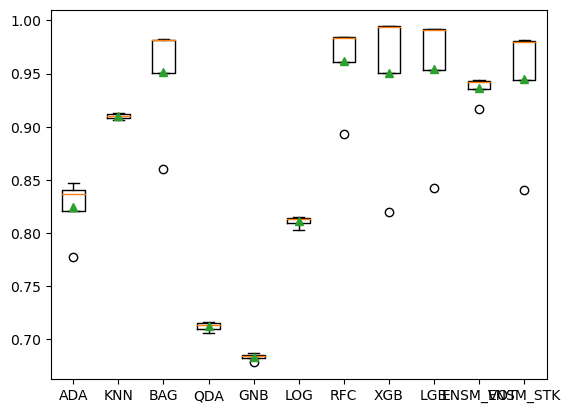

In [154]:
name,score = list(),list()
models = get_models()
for nm,mod in models.items():
    name.append(nm)
    sr = model_eval(mod,X_res,y_res)
    score.append(sr)
    print("Model Name: {0} , Score: {1:.4f} , Dev : {2:.4f}".format(nm,np.mean(sr),np.std(sr)))
plt.boxplot(score,labels=name,showmeans=True)

# Baseline Model Building

In [156]:
data_test_2 = pd.read_csv('test_2umaH9m.csv')
emp_id = data_test_2['employee_id']

In [167]:
models = list()
# models.append(('ADA',AdaBoostClassifier()))
# models.append(('KNN',KNeighborsClassifier(n_neighbors=4)))
#models.append(('BAG',BaggingClassifier()))
# models.append(('QDA',QuadraticDiscriminantAnalysis()))
# models.append(('GNB',GaussianNB()))
# models.append(('LOG',LogisticRegression()))
models.append(('RFC',RandomForestClassifier()))
models.append(('XGB',xgboost.XGBClassifier()))
models.append(('LGB',ltb.LGBMClassifier()))
enb_clf = StackingClassifier(estimators= models,final_estimator=LogisticRegression())

enb_clf.fit(data_train_ENC_MMS_KBest,target)
y_pred_vot =enb_clf.predict(data_test_ENC_MMS_KBest)
Submission_lr_mod= pd.DataFrame(tuple(zip(emp_id,y_pred_vot)),columns = ['employee_id','is_promoted'])
filepath = Path('C:\\Users\\anshu\\OneDrive\\Desktop\\My Window\\Git\\MachineLearningProblems\\HR Analytics\\Submission_HR_Analytics_STK.csv') 
Submission_lr_mod.to_csv(filepath,index=False)
# Score - 0.496
# if RFC included - 0.495

In [166]:
 models = list()
# models.append(('ADA',AdaBoostClassifier()))
# models.append(('KNN',KNeighborsClassifier(n_neighbors=4)))
#models.append(('BAG',BaggingClassifier()))
# models.append(('QDA',QuadraticDiscriminantAnalysis()))
# models.append(('GNB',GaussianNB()))
# models.append(('LOG',LogisticRegression()))
models.append(('RFC',RandomForestClassifier()))
models.append(('XGB',xgboost.XGBClassifier()))
models.append(('LGB',ltb.LGBMClassifier()))
enb_clf = VotingClassifier(estimators= models,voting='soft')

enb_clf.fit(data_train_ENC_MMS_KBest,target)
y_pred_vot =enb_clf.predict(data_test_ENC_MMS_KBest)
Submission_lr_mod= pd.DataFrame(tuple(zip(emp_id,y_pred_vot)),columns = ['employee_id','is_promoted'])
filepath = Path('C:\\Users\\anshu\\OneDrive\\Desktop\\My Window\\Git\\MachineLearningProblems\\HR Analytics\\Submission_HR_Analytics_VOTE.csv') 
Submission_lr_mod.to_csv(filepath,index=False)
#Score - 0.48
# if RFC included - 0.47

In [162]:
BAG_CLF = BaggingClassifier()
BAG_CLF.fit(data_train_ENC_MMS_KBest,target)
y_pred_bag=BAG_CLF.predict(data_test_ENC_MMS_KBest)
Submission_lr_mod= pd.DataFrame(tuple(zip(emp_id,y_pred_bag)),columns = ['employee_id','is_promoted'])
filepath = Path('C:\\Users\\anshu\\OneDrive\\Desktop\\My Window\\Git\\MachineLearningProblems\\HR Analytics\\Submission_HR_Analytics_BAG.csv') 
Submission_lr_mod.to_csv(filepath,index=False)
#Score - 0.45

# Tune Hyperparameters